In [37]:
%%time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix,roc_auc_score,roc_curve, r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore') 

CPU times: total: 0 ns
Wall time: 0 ns


In [38]:
df=pd.read_csv('Book1.csv')
df

,customer_id,age,gender,monthly_charges,total_charges,tenure,contract_type,payment_method,churn
0,1,32,Male,65.5,195.5,3,Month-to-month,Credit Card,Yes
1,2,45,Female,89.9,2465.8,24,Two-year,Bank Transfer,No
2,3,28,Male,75.1,321.7,7,Month-to-month,Credit Card,Yes
3,4,55,Female,98.2,4316.6,48,Two-year,Bank Transfer,No
4,5,42,Female,79.9,2020.5,18,One year,Credit Card,No
5,6,38,Male,61.4,349.6,6,Month-to-month,Electronic,Yes
6,7,50,Male,94.8,5748.9,60,Two-year,Bank Transfer,No
7,8,29,Female,72.5,785.1,11,One year,Credit Card,Yes
8,9,36,Female,83.7,1456.2,22,One year,Electronic,No
9,10,44,Male,78.1,624.3,9,Month-to-month,Bank Transfer,Yes


## Exploratory data Analysis

In [39]:
# Remove spaces from column names
df = df.rename(columns=lambda x: x.replace(' ', ''))


In [40]:
df.info() # Check Null and Dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      20 non-null     int64  
 1   age              20 non-null     int64  
 2   gender           20 non-null     object 
 3   monthly_charges  20 non-null     float64
 4   total_charges    20 non-null     float64
 5   tenure           20 non-null     int64  
 6   contract_type    20 non-null     object 
 7   payment_method   20 non-null     object 
 8   churn            20 non-null     object 
dtypes: float64(2), int64(3), object(4)
memory usage: 1.5+ KB


In [41]:
df.describe() # display summary statistics for a dataframe

,customer_id,age,monthly_charges,total_charges,tenure
count,20.00000,20.000000,20.000000,20.0000,20.000000
mean,10.50000,40.650000,80.995000,2087.6650,23.650000
std,5.91608,9.399188,12.009666,1948.2988,19.564401
min,1.00000,27.000000,61.400000,167.3000,2.000000
25%,5.75000,32.750000,72.725000,579.2500,7.750000
50%,10.50000,40.500000,79.500000,1219.6500,15.500000
75%,15.25000,47.250000,90.250000,3483.3750,38.250000
max,20.00000,60.000000,104.300000,6281.9000,60.000000


In [42]:
df.isna().any() # display null values 

customer_id        False
age                False
gender             False
monthly_charges    False
total_charges      False
tenure             False
contract_type      False
payment_method     False
churn              False
dtype: bool

In [43]:
df.shape  # display the size of row and column

(20, 9)

In [44]:
df.head() #display 5 starting rows of the dataset

,customer_id,age,gender,monthly_charges,total_charges,tenure,contract_type,payment_method,churn
0,1,32,Male,65.5,195.5,3,Month-to-month,Credit Card,Yes
1,2,45,Female,89.9,2465.8,24,Two-year,Bank Transfer,No
2,3,28,Male,75.1,321.7,7,Month-to-month,Credit Card,Yes
3,4,55,Female,98.2,4316.6,48,Two-year,Bank Transfer,No
4,5,42,Female,79.9,2020.5,18,One year,Credit Card,No


In [45]:
df.duplicated().any() # display duplicate values

False

In [46]:
df.duplicated().sum()

0

In [47]:
df['churn'].unique()

array([' Yes', ' No'], dtype=object)

In [48]:
df['churn'].value_counts()

 No     11
 Yes     9
Name: churn, dtype: int64

# Univariate Analysis

### Numerical Features

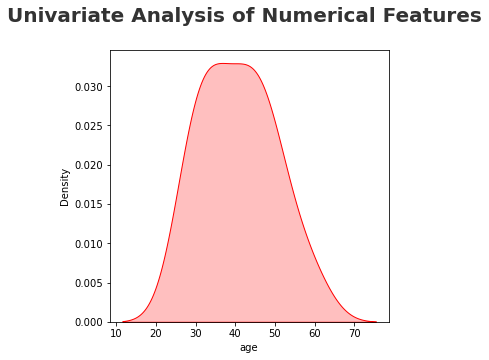

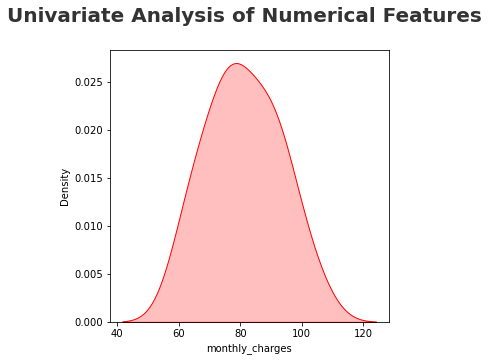

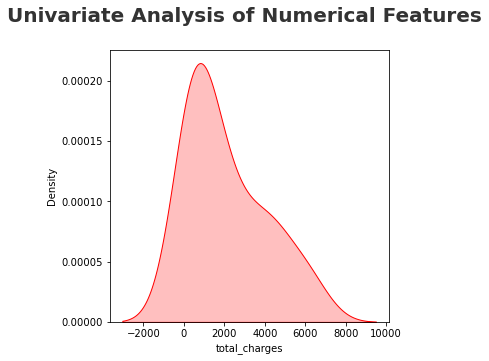

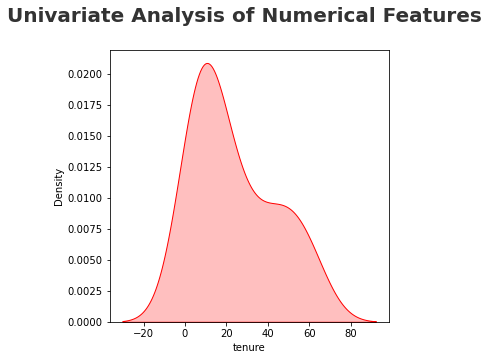

In [49]:
b=['age','monthly_charges','total_charges','tenure']
for i in b:
    plt.figure(figsize=(5,5))
    plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
    sns.kdeplot(x=df[i],shade=True, color='red')

### Categorical Features

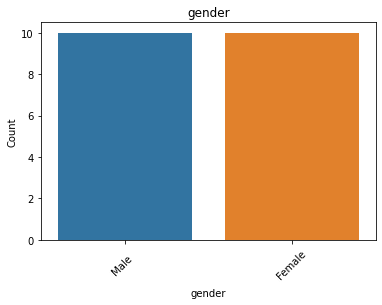

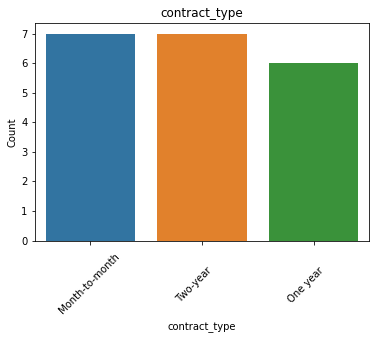

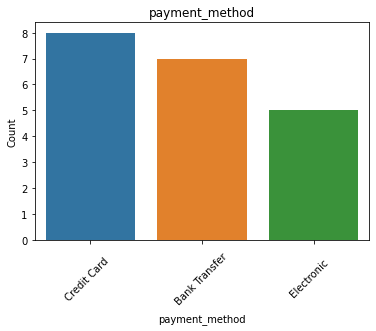

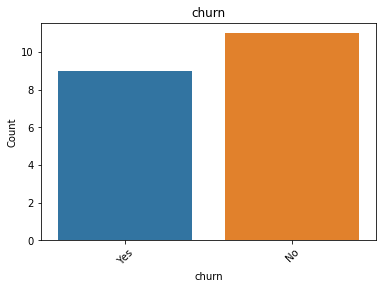

In [50]:
categorical=['gender','contract_type','payment_method','churn']
for i in categorical:
    plt.figure(figsize=(6, 4))  # Adjust the figure size if needed
    sns.countplot(x=i, data=df)
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.show()

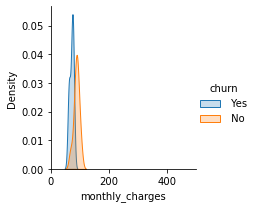

In [51]:
sns.FacetGrid(df,hue='churn',xlim=(0,500)).map(sns.kdeplot,'monthly_charges',shade=True).add_legend()

### Outliers detection

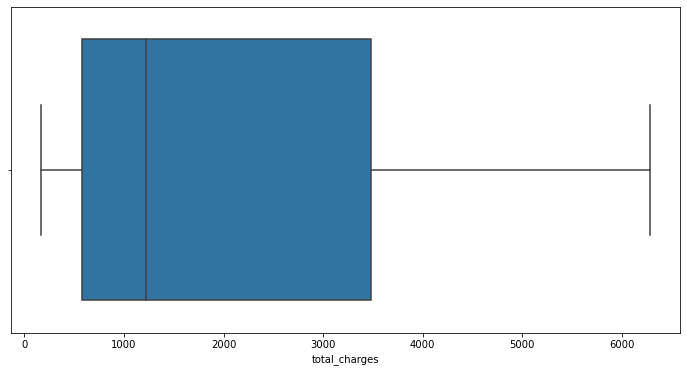

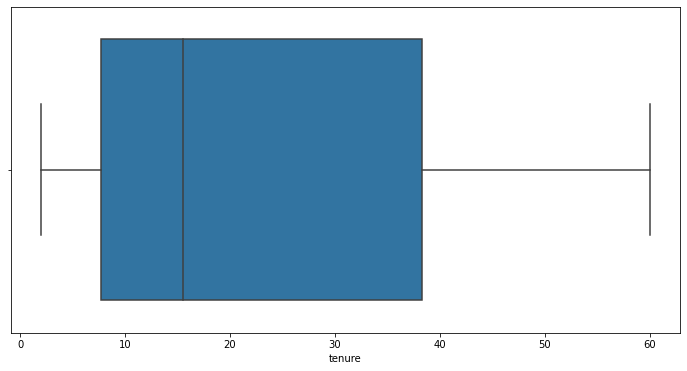

In [52]:
## Outliers Detection 
def boxplots():
    a=['total_charges','tenure']
    for i in a:
        plt.figure(figsize=(12,6))
        sns.boxplot(df[i])
        print()
boxplots() 

## Bivariate Analysis

In [53]:
## Coverting categorical features to numerical
object_datatype=df.select_dtypes('object')
def encoding():
    for i in object_datatype.columns:
        label_enco=LabelEncoder()
        df[i]=label_enco.fit_transform(df[i])
encoding()

In [54]:
print('Mean of the dataset:',  df.mean(numeric_only=True))

Mean of the dataset: customer_id          10.500
age                  40.650
gender                0.500
monthly_charges      80.995
total_charges      2087.665
tenure               23.650
contract_type         1.000
payment_method        0.900
churn                 0.450
dtype: float64


In [55]:
print('Median of the dataset:',  df.median(numeric_only=True))

Median of the dataset: customer_id          10.50
age                  40.50
gender                0.50
monthly_charges      79.50
total_charges      1219.65
tenure               15.50
contract_type         1.00
payment_method        1.00
churn                 0.00
dtype: float64


In [56]:
df.corr()

,customer_id,age,gender,monthly_charges,total_charges,tenure,contract_type,payment_method,churn
customer_id,1.000000e+00,-0.006152,-0.069369,0.006185,0.024041,0.077530,1.841007e-17,0.180621,-0.026144
age,-6.152270e-03,1.000000,0.191023,0.824326,0.868197,0.844200,7.110421e-01,-0.608937,-0.623678
gender,-6.936880e-02,0.191023,1.000000,-0.065353,0.051062,0.023598,-2.390457e-01,-0.130189,0.301511
monthly_charges,6.185402e-03,0.824326,-0.065353,1.000000,0.891530,0.889207,8.515777e-01,-0.541695,-0.732856
total_charges,2.404138e-02,0.868197,0.051062,0.891530,1.000000,0.989094,8.742788e-01,-0.590960,-0.752843
tenure,7.753007e-02,0.844200,0.023598,0.889207,0.989094,1.000000,8.806411e-01,-0.596360,-0.773977
contract_type,1.841007e-17,0.711042,-0.239046,0.851578,0.874279,0.880641,1.000000e+00,-0.622422,-0.840875
payment_method,1.806210e-01,-0.608937,-0.130189,-0.541695,-0.590960,-0.596360,-6.224220e-01,1.000000,0.510295
churn,-2.614435e-02,-0.623678,0.301511,-0.732856,-0.752843,-0.773977,-8.408750e-01,0.510295,1.000000


<AxesSubplot:>

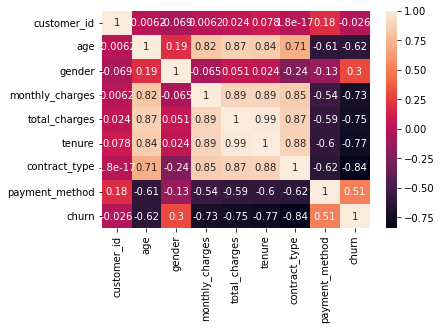

In [57]:
sns.heatmap(df.corr(),annot=True)

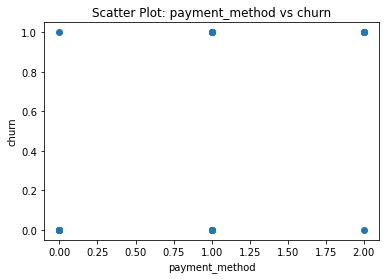

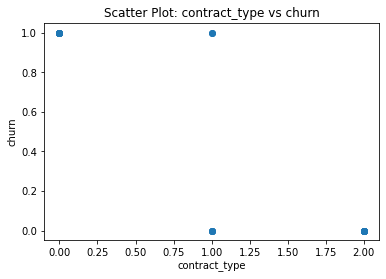

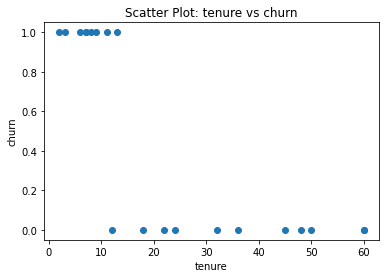

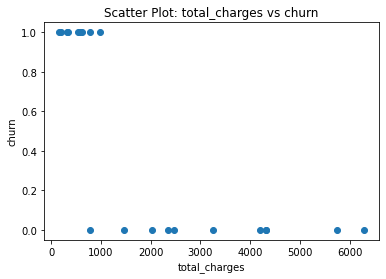

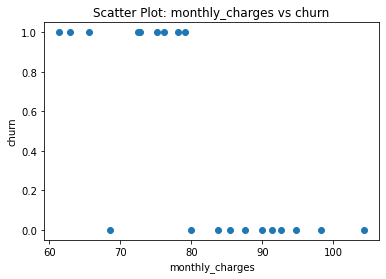

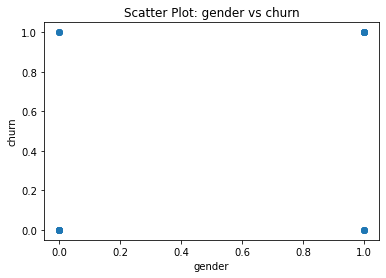

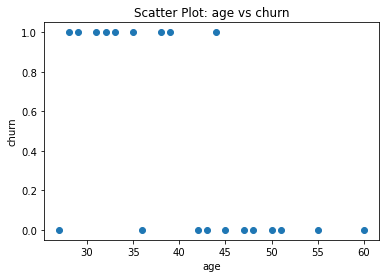

In [58]:
#to show a pattarn between target variable and other features.
# We plot scatter plots for each independent variable against the target variable
target_variable = 'churn'
independent_variables = ['payment_method', 'contract_type', 'tenure', 'total_charges','monthly_charges', 'gender', 'age']
for var in independent_variables:
    plt.figure(figsize=(6, 4))
    plt.scatter(df[var], df[target_variable])
    plt.xlabel(var)
    plt.ylabel(target_variable)
    plt.title(f'Scatter Plot: {var} vs {target_variable}')
    plt.show()

In [59]:
# correlation matrix
correlation_matrix = df.corr()

# correlations with respect to 'churn' column
target_correlations = correlation_matrix['churn']

# Find features with correlations greater than 0.7 or less than -0.7
high_correlation_features = target_correlations[(target_correlations > 0.7) | (target_correlations < -0.7)].index.tolist()

print("Features with correlations greater than 0.7 or less than -0.7 with respect to 'churn':")
print(high_correlation_features)


Features with correlations greater than 0.7 or less than -0.7 with respect to 'churn':
['monthly_charges', 'total_charges', 'tenure', 'contract_type', 'churn']


In [60]:
# correlation matrix
correlation_matrix = df.corr()

# correlations with respect to 'churn' column
target_correlations = correlation_matrix['churn']

# features with correlations greater than 0.7 or less than -0.7
high_correlation_features = target_correlations[(target_correlations > 0.7) | (target_correlations < -0.7)]

print("Features with correlations greater than 0.7 or less than -0.7 with respect to 'churn':")
for feature, correlation in high_correlation_features.items():
    print(f"{feature}: {correlation}")


Features with correlations greater than 0.7 or less than -0.7 with respect to 'churn':
monthly_charges: -0.732855978370114
total_charges: -0.7528433903095545
tenure: -0.7739768902270425
contract_type: -0.8408749651825218
churn: 1.0


## Report based of exploratory data analysis

## Hold out validation

In [61]:
x= df.drop('churn',axis=1)
y= df.churn

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3)

## Logistic regression


In [63]:
def log_evaluation():
    log_reg = LogisticRegression()
    log_reg.fit(x_train,y_train)
    y_pred = log_reg.predict(x_test)
    y_pred_train=log_reg.predict(x_train)
    accuracy=accuracy_score(y_test,y_pred)
    print(accuracy)
    cnf_matrix = confusion_matrix(y_test,y_pred)
    print(cnf_matrix)
    print(classification_report(y_test,y_pred))
    print('Accuracy score for testing',(accuracy_score(y_test,y_pred))*100)
    print('Accuracy score for training',(accuracy_score(y_train,y_pred_train))*100)
log_evaluation() 

1.0
[[4 0]
 [0 2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

Accuracy score for testing 100.0
Accuracy score for training 100.0


## KNN Classifier

In [64]:
def knn_evaluation():
    knn_model=KNeighborsClassifier(n_neighbors=12,p=2)
    knn_model.fit(x_train,y_train)
    y_pred=knn_model.predict(x_test)
    cnf_matrix = confusion_matrix(y_test,y_pred)
    cnf_matrix
    print(classification_report(y_test,y_pred))
knn_evaluation() 

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.50      1.00      0.67         2

    accuracy                           0.67         6
   macro avg       0.75      0.75      0.67         6
weighted avg       0.83      0.67      0.67         6



### parameter tunning

In [65]:
## Grid search cv

def knn_grid():
    hyperparamters = {'n_neighbors':np.arange(2,20),
                         'p':[1,2]}
    gscv_model= GridSearchCV(KNeighborsClassifier(),hyperparamters,cv=5)
    gscv_model.fit(x_train,y_train)
    gscv_model.best_estimator_
    para=gscv_model.best_params_
    print('Hyperparameter value using Grid Search cv',para)
    n=[]
    for i,j in para.items():
        n.append(j)
    knn_model=KNeighborsClassifier(n_neighbors=n[0],p=n[1])
    knn_model.fit(x_train,y_train)
    y_pred1=knn_model.predict(x_test)
    print('Accuracy score after using Grid search cv',[accuracy_score(y_test,y_pred1)])
    print(classification_report(y_test,y_pred1))

knn_grid()   

Hyperparameter value using Grid Search cv {'n_neighbors': 2, 'p': 2}
Accuracy score after using Grid search cv [1.0]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [66]:
### Randomised search cv

def knn_rscv():
    hyperparamters = {'n_neighbors':np.arange(5,25),
                         'p':[1,2]}
    rscv_model=RandomizedSearchCV(KNeighborsClassifier(),hyperparamters,cv=5)
    rscv_model.fit(x_train,y_train)
    rscv_model.best_estimator_
    para=rscv_model.best_params_
    print('Hyperparameter value using Randomized Search cv',para)
    n=[]
    for i,j in para.items():
        n.append(j)
    knn_model=KNeighborsClassifier(n_neighbors=n[1],p=n[0])
    knn_model.fit(x_train,y_train)
    y_pred1=knn_model.predict(x_test)
    print('Accuracy score after using Randomized search cv',accuracy_score(y_test,y_pred1))
    print(classification_report(y_test,y_pred1))

knn_rscv()

Hyperparameter value using Randomized Search cv {'p': 2, 'n_neighbors': 9}
Accuracy score after using Randomized search cv 0.8333333333333334
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.67      1.00      0.80         2

    accuracy                           0.83         6
   macro avg       0.83      0.88      0.83         6
weighted avg       0.89      0.83      0.84         6



## Decision Tree 

In [67]:
def decision_tree():
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3)
    Decision_model=DecisionTreeClassifier()
    Decision_model.fit(x_train,y_train)
    #testing prediction of y
    y_pred=Decision_model.predict(x_test)
    #training prediction of y
    y_pred_train=Decision_model.predict(x_train)
    print('Accuracy score for testing',(accuracy_score(y_test,y_pred))*100)
    print('Accuracy score for training',(accuracy_score(y_train,y_pred_train))*100)
decision_tree()

Accuracy score for testing 100.0
Accuracy score for training 100.0


### Parameter tunning

In [68]:
def decision_grid():
    hyperparameters = {'criterion':["entropy",'Gini'],
                    'max_depth':np.arange(4,25),
                  'min_samples_leaf':np.arange(2,4),
                  'min_samples_split':np.arange(2,4)}
    gscv_dt_model=GridSearchCV(DecisionTreeClassifier(),hyperparameters,cv=3)
    gscv_dt_model.fit(x_train,y_train)
    gscv_dt_model.best_params_
    para=gscv_dt_model.best_params_
    print('Hyperparameter value using Grid Search cv',para)
    y_pred_gscv=gscv_dt_model.predict(x_test)
    print('Accuracy score for testing',[ accuracy_score(y_test,y_pred_gscv)])
    y_pred_train_gscv=gscv_dt_model.predict(x_train)
    print('Accuracy score for training',[accuracy_score(y_train,y_pred_train_gscv)])
decision_grid()   

Hyperparameter value using Grid Search cv {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy score for testing [1.0]
Accuracy score for training [0.9285714285714286]


In [69]:
def decision_rscv():
    hyperparameters = {'criterion':["entropy",'Gini'],
                    'max_depth':np.arange(4,100),
                  'min_samples_leaf':np.arange(2,20),
                  'min_samples_split':np.arange(2,10)}
    rscv_dt_model=RandomizedSearchCV(DecisionTreeClassifier(),hyperparameters,cv=5)
    rscv_dt_model.fit(x_train,y_train)
    rscv_dt_model.best_params_
    para=rscv_dt_model.best_params_
    print('Hyperparameter value using Randomised Search cv',para)
    y_pred_rscv=rscv_dt_model.predict(x_test)
    print('Accuracy score for testing',[ accuracy_score(y_test,y_pred_rscv)])
    y_pred_train_rscv=rscv_dt_model.predict(x_train)
    print('Accuracy score for training',[accuracy_score(y_train,y_pred_train_rscv)])

decision_rscv()   

Hyperparameter value using Randomised Search cv {'min_samples_split': 8, 'min_samples_leaf': 2, 'max_depth': 90, 'criterion': 'entropy'}
Accuracy score for testing [1.0]
Accuracy score for training [0.9285714285714286]


## Final model building on entire data

In [70]:
def Final():
    lr_final = LogisticRegression()
    lr_final.fit(x,y)
    y_pred = lr_final.predict(x)
    accuracy=accuracy_score(y,y_pred)
    print(accuracy)
    cnf_matrix = confusion_matrix(y,y_pred)
    print(cnf_matrix)
    print(classification_report(y,y_pred))
Final()

1.0
[[11  0]
 [ 0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



## Final report

The final model's build on logistic regression because its impeccable accuracy, precision, recall, and F1-score on the given dataset showcase its exceptional performance. It successfully classified all instances, providing reliable predictions and demonstrating its effectiveness in accurately distinguishing between the two classes.